# <u>PyTorch</u>

NumPy arrays and PyTorch tensors are handled very similarly, but there are differences as well.

In [ ]:
import numpy as np
import torch as tc

### <u>Lists, arrays, and tensors</u>

We can convert lists to NumPy arrays as we've seen, so, similarly, we can convert NumPy arrays into PyTorch tensors, and vice-versa:

In [ ]:
x_list = [3.14, 2.71, 42]
print("Type of x_list:      ", type(x_list))
x_array = np.asarray(x_list)
print("Convert to array:    ", type(x_array))
x_tensor = tc.tensor(x_list)
print("Convert to tensor:   ", type(x_tensor))
x_list = x_tensor.tolist()
print("Convert back to list:", type(x_list))

Type of x_list:       <class 'list'>
Convert to array:     <class 'numpy.ndarray'>
Convert to tensor:    <class 'torch.Tensor'>
Convert back to list: <class 'list'>


Be careful when converting though! E.g., when you use `x_tensor.numpy()`, whatever you do to the array will reflect on the tensor:

In [ ]:
print(f"Before: x_array = {x_array}, x_tensor = {x_tensor}")
x_array = x_tensor.numpy()
x_array[0] = 3
print(f"After:  x_array = {x_array}, x_tensor = {x_tensor}")

Before: x_array = [ 3.14  2.71 42.  ], x_tensor = tensor([ 3.1400,  2.7100, 42.0000])
After:  x_array = [ 3.    2.71 42.  ], x_tensor = tensor([ 3.0000,  2.7100, 42.0000])


Το avoid this behavior, you can use the `copy()`:

In [ ]:
x_tensor = tc.tensor([3.14, 2.71, 42])
x_array = x_tensor.numpy().copy()
print(f"Before: x_array = {x_array}, x_tensor = {x_tensor}")
x_array[0] = 3
print(f"After:  x_array = {x_array}, x_tensor = {x_tensor}")

Before: x_array = [ 3.14  2.71 42.  ], x_tensor = tensor([ 3.1400,  2.7100, 42.0000])
After:  x_array = [ 3.    2.71 42.  ], x_tensor = tensor([ 3.1400,  2.7100, 42.0000])


Slicing tensors is also possible as in the case of NumPy arrays `mytensor[start:stop:step]`:

In [ ]:
x1 = tc.tensor([3, 2, 1, 0])
x2 = tc.tensor([5, 6, 7, 8])
print(x1[1:4:2], x2[1:-1])

tensor([2, 0]) tensor([6, 7])


But, some slice operations like reversing `x1[::-1]` do not work with tensors, because `step` is required to be greater than 0. However, do not rush to implement a reverse function either. If we just googled, we'd see that there is a function for that already called `flip()`:

In [ ]:
print(f"x1 = {x1}\nx1.flip(0) = {x1.flip(0)}")

x1 = tensor([3, 2, 1, 0])
x1.flip(0) = tensor([0, 1, 2, 3])


All the standard math operations are overloaded to work with tensors too:

In [ ]:
print(f" x1 = {x1}\n x2 = {x2}")
print(f"Element-wise sum:\n x1 + x2 = {x1 + x2}")
print(f"Element-wise product:\n x1 * x2 = {x1 * x2}")
print(f"Dot product:\n x1 @ x2 = {x1 @ x2}")

 x1 = tensor([3, 2, 1, 0])
 x2 = tensor([5, 6, 7, 8])
Element-wise sum:
 x1 + x2 = tensor([8, 8, 8, 8])
Element-wise product:
 x1 * x2 = tensor([15, 12,  7,  0])
Dot product:
 x1 @ x2 = 34


In [ ]:
print(f" x1 = {x1}\n x2 = {x2}")
print(f"Add a scalar:\n x1 + 2 = {x1 + 2}")
print(f"Multiply by a scalar:\n x1 * 2 = {x1 * 2}")
print(f"Raise to a scalar power:\n x1 ** 2 = {x1 ** 2}")

 x1 = tensor([3, 2, 1, 0])
 x2 = tensor([5, 6, 7, 8])
Add a scalar:
 x1 + 2 = tensor([5, 4, 3, 2])
Multiply by a scalar:
 x1 * 2 = tensor([6, 4, 2, 0])
Raise to a scalar power:
 x1 ** 2 = tensor([9, 4, 1, 0])


In [ ]:
print(f" x1 = {x1}\n x2 = {x2}")
print(f"Sum of all elements of a tensor:\n x1.sum() = {x1.sum()}, or tc.sum(x1) = {tc.sum(x1)}")
print(f"Product of all elements of a tensor:\n x2.prod() = {x2.prod()}, or tc.prod(x2) = {tc.prod(x2)}")

 x1 = tensor([3, 2, 1, 0])
 x2 = tensor([5, 6, 7, 8])
Sum of all elements of a tensor:
 x1.sum() = 6, or tc.sum(x1) = 6
Product of all elements of a tensor:
 x2.prod() = 1680, or tc.prod(x2) = 1680


## <u>`reshape()` vs `view()` in PyTorch tensors</u>

On the surface, they appear to do the same thing:

In [ ]:
x = tc.arange(8*12).view((8, 4, 3))
y = tc.arange(8*15).reshape((8, 3, 5))
z = x @ y

print(f"x.shape = {x.shape}")
print(f"y.shape = {y.shape}")
print(f"z.shape = {z.shape}")

x.shape = torch.Size([8, 4, 3])
y.shape = torch.Size([8, 3, 5])
z.shape = torch.Size([8, 4, 5])


However, they are some important differences. In summary, two things:

1) Use `view()` if you want to share memory and potentially avoid unnecessary data copying. `reshape()` <u>may</u> return a copy <u>or</u> a `view()` of the original tensor. I.e., there is no data sharing guarantee with `reshape()`. This fact has caused me headaches in the past, so, I stick with `view()`.

2) `view()` only works if the tensor's data is contiguous. `reshape()` returns a new tensor with the desired shape, regardless of whether the original tensor is contiguous or not. This is the only case I would have to use `reshape()`.

Let me quickly show you an example of what I mean by the second point:

In [ ]:
x = tc.zeros(2, 3)
print(f"Original tensor:\n x = {x}")
print(f"\nFlattening with view() works:\n x.view(-1) = {x.view(-1)}")
y = x.t()
print(f"\nTransposed tensor:\n y = {y}")
print(f"\nview() will raise an error now if we do:\n y.view(-1)")
print(f"\nBut reshape() works:\n y.reshape(-1) = {y.reshape(-1)}")

Original tensor:
 x = tensor([[0., 0., 0.],
        [0., 0., 0.]])

Flattening with view() works:
 x.view(-1) = tensor([0., 0., 0., 0., 0., 0.])

Transposed tensor:
 y = tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

view() will raise an error now if we do:
 y.view(-1)

But reshape() works:
 y.reshape(-1) = tensor([0., 0., 0., 0., 0., 0.])


## <u>Random number generation and distributions in PyTorch</u>

In [ ]:
seed = 42
tc.manual_seed(seed)

In [ ]:
# Generate random integers uniformly between low and high
low = -2
high = 3
num_points = 10

# Difference with NumPy: size requires a shape
x_int = tc.randint(low=low, high=high, size=(num_points,))
print(f"{num_points} random integers in U[{low}, {high}]: \n{x_int}")

10 random integers in U[-2, 3]: 
tensor([ 0,  0, -1,  2, -1, -2, -2,  2, -2,  1])


Uniform distribution sampling example:

In [ ]:
# Generate float numbers uniformly in the interval [a, b]
a = 3
b = 10
num_points = 10000

# Using PyTorch's distributions:
import torch.distributions as tc_dist
x_unif = tc_dist.uniform.Uniform(low=a, high=b).sample((num_points,))
print(x_unif)

# Alternative without this requirement:
x_unif = (b-a)*tc.rand(num_points) + a
print(x_unif)

tensor([9.5422, 7.1551, 9.0858,  ..., 9.9325, 7.4122, 9.7191])
tensor([6.9369, 7.0017, 9.0228,  ..., 5.0559, 3.1105, 9.6089])


Gaussian ditribution sampling example:

In [ ]:
mu = 1
sigma = 2
num_points = 10000

# Using PyTorch's distributions:
x_norm = tc_dist.normal.Normal(loc=mu, scale=sigma).sample((num_points,))
print(x_norm)

# Alternative without this requirement:
x_norm = sigma*tc.randn(num_points) + mu
print(x_norm)

tensor([-1.5047,  0.4778,  1.7173,  ...,  2.0729,  0.7615,  3.9844])
tensor([ 2.1302,  1.4942,  0.9108,  ...,  0.9500,  3.0975, -1.3606])


Plotting:

In [ ]:
import matplotlib.pyplot as plt

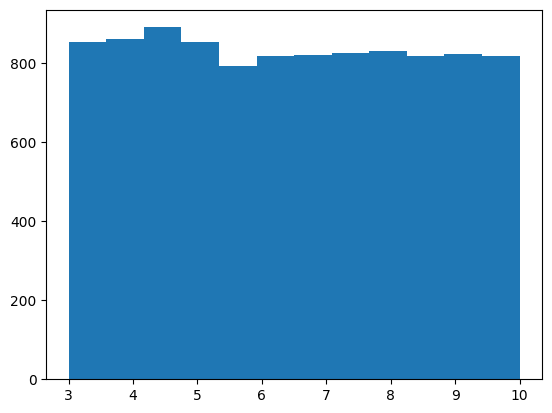

In [ ]:
plt.figure()
plt.hist(x_unif, bins=12)
plt.show()
plt.close()

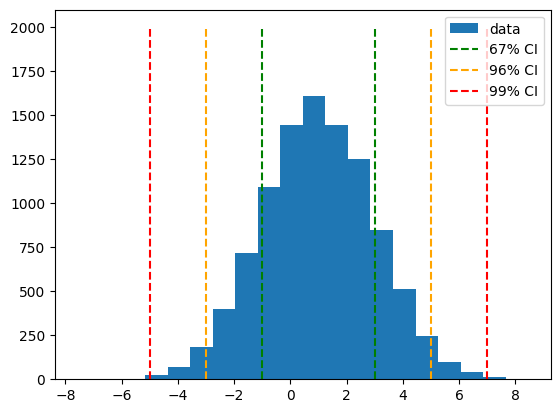

In [ ]:
plt.figure()
plt.hist(x_norm, bins=20, label='data')
plt.vlines([mu-sigma, mu+sigma], 0, 2000, linestyles='--', colors=['green', 'green'], label='67% CI')
plt.vlines([mu-2*sigma, mu+2*sigma], 0, 2000, linestyles='--', colors=['orange', 'orange'], label='96% CI')
plt.vlines([mu-3*sigma, mu+3*sigma], 0, 2000, linestyles='--', colors=['red', 'red'], label='99% CI')
plt.legend()
plt.show()
plt.close()